In this notebook, we'll predict housing prices using a neural network. By performing a train/test split and comparing performance to linear regressors, we can get a sense of the nuances and increases in accuracy when using more sophisticated models.

In [1]:
### In this cell, we import the necessary packages. Note the heavy use of the scikit-learn library
### for the machine learning packages

import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression

### Dataset Description

We'll be using a dataset from the scikit-learn datasets page that has information on housing prices in Boston. You can explore the dataset at the following link: https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset

In [2]:
### In this cell, we read in the dataset into a dataframe. 
### The 'X' frame corresponds to the features, the 'y' is the target (housing prices).

X, y = load_boston(return_X_y=True)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
### Notice that the X dataframe doesn't have columns. We can add them in manually from the dataset description page.

columns = ['CRIM per capita crime rate by town', 
'ZN proportion of residential land zoned for lots over 25,000 sq.ft.',
'INDUS proportion of non-retail business acres per town',
'CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
'NOX nitric oxides concentration (parts per 10 million)',
'RM average number of rooms per dwelling',
'AGE proportion of owner-occupied units built prior to 1940',
'DIS weighted distances to five Boston employment centres',
'RAD index of accessibility to radial highways',
'TAX full-value property-tax rate per $10,000',
'PTRATIO pupil-teacher ratio by town',
'B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town',
'LSTAT % lower status of the population']

X.columns = columns
X.head()

,CRIM per capita crime rate by town,"ZN proportion of residential land zoned for lots over 25,000 sq.ft.",INDUS proportion of non-retail business acres per town,CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),NOX nitric oxides concentration (parts per 10 million),RM average number of rooms per dwelling,AGE proportion of owner-occupied units built prior to 1940,DIS weighted distances to five Boston employment centres,RAD index of accessibility to radial highways,"TAX full-value property-tax rate per $10,000",PTRATIO pupil-teacher ratio by town,B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town,LSTAT % lower status of the population
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
### Let's do some simple data exploration. 

X.describe()

,CRIM per capita crime rate by town,"ZN proportion of residential land zoned for lots over 25,000 sq.ft.",INDUS proportion of non-retail business acres per town,CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),NOX nitric oxides concentration (parts per 10 million),RM average number of rooms per dwelling,AGE proportion of owner-occupied units built prior to 1940,DIS weighted distances to five Boston employment centres,RAD index of accessibility to radial highways,"TAX full-value property-tax rate per $10,000",PTRATIO pupil-teacher ratio by town,B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town,LSTAT % lower status of the population
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<AxesSubplot:>

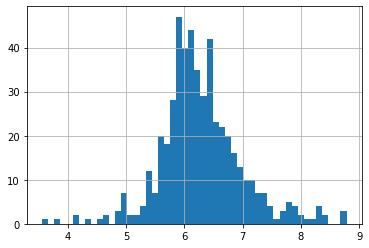

In [5]:
### We can take a look at the average number of rooms with a histogram.

X.iloc[:, 5].hist(bins = 50)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

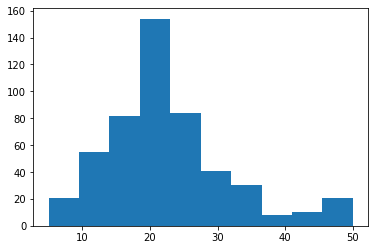

In [6]:
### In this cell, we look at a histogram of the target variable.

plt.hist(y)

Text(0, 0.5, 'Median House Price ( in $1000s)')

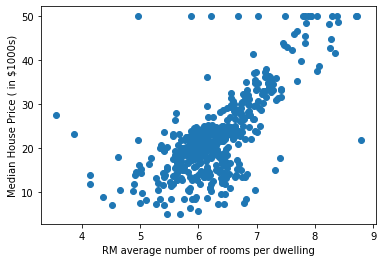

In [7]:
### In this cell, we compare the average number of rooms to house prices. There is a strong positive correlation.

plt.scatter(X.iloc[:, 5], y)
plt.xlabel(X.columns[5])
plt.ylabel('Median House Price ( in $1000s)')

In [8]:
### In order to assess the accuracy of our model, we will perform a train/test split.
### By deafult, scikit-learn uses a 75/25 split.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
### Next, we'll scale the feature space so the range of each feature is comparable. 
### To do this, we will first fit a scaler to the train set and then use it to transform 
### BOTH the train and test set. When using a model in the real world, we assume that we don't know
### the actual test set, so we can't fit a sperate scaler on that set specifcially.

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
### In this cell, we create a standard multi-layer perceptron regressor. 
### This is a simple neural network model that is standard in scikit-learn.
### We increase the maximum iterations to 100000 to ensure convergence.

reg = MLPRegressor(random_state=0, max_iter = 100000)

In [11]:
### Next, we fit the model on the train set. 

reg.fit(X_train_scaled,y_train)

MLPRegressor(max_iter=100000, random_state=0)

In [12]:
### We can quickly test the r2 score on the test set.

reg.score(X_test_scaled, y_test)

0.7905063170466198

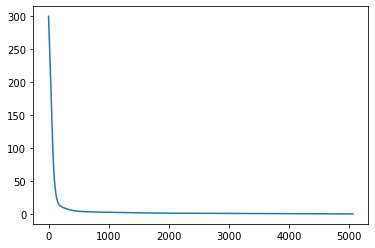

In [13]:
### Training loss over time

plt.plot(reg.loss_curve_)

In [14]:
### There are many paramaters we can tune to increase performance. 
### In this notebook, we'll change the learning rate and test performance on a cross-validation set.
### This is an example of hyper-paramater tuning.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
### In this cell, we iterate through different learning rates to examine perfomance on the validation set.


learning_rates = [0.0001, 0.001, 0.01, 1, 10]

for i in learning_rates:
    reg = MLPRegressor(random_state=0, max_iter = 10000, learning_rate_init = i)
    reg.fit(X_train_scaled,y_train)
    print("Learning Rate:", i, "Score", reg.score(X_val_scaled, y_val))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.0001 Score 0.8985341166309528
Learning Rate: 0.001 Score 0.831527772549585
Learning Rate: 0.01 Score 0.5462237397938277
Learning Rate: 1 Score 0.5553793681607266
Learning Rate: 10 Score -162.37454612466033


In [16]:
### We can see that the best score comes with an inital learning rate of 0.0001.
### Let's analyze the performance on the hold-out set. 

reg = MLPRegressor(random_state=0, max_iter = 10000, learning_rate_init = 0.0001)
reg.fit(X_train_scaled,y_train)
print("Score on hold-out set", reg.score(X_test_scaled, y_test))

Score on hold-out set 0.8000062104700671


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
### Finally, let's compare the score to that of linear regression.

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.6401080939909236

In [18]:
### Clearly, neural networks are outperforming linear regressors in this case.